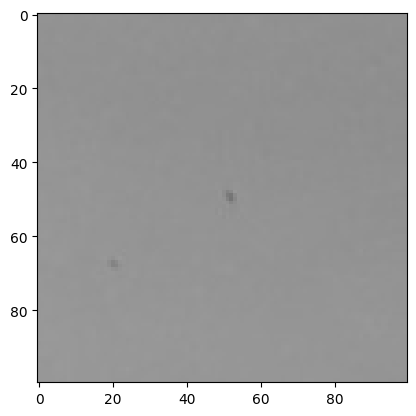

In [1]:
import cv2
import imutils
import matplotlib.pyplot as plt

folder_path = 'bird_miniatures'

image = cv2.imread('bird_miniatures/E0454_TR0000_OB0010_T01_M02.jpg')
imgplt = plt.imshow(image)
plt.show()

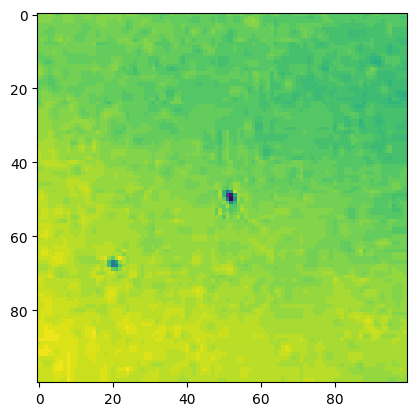

In [2]:
# convert  the image to a grayscale type.
gray_scaled = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imgplt = plt.imshow(gray_scaled)
plt.show()

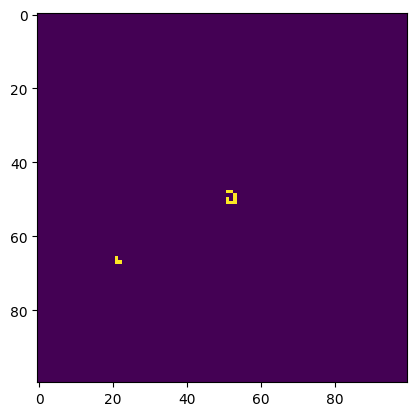

In [3]:
#Applying Edge detection to find outlines of objects.
edged = cv2.Canny(gray_scaled, 30,90)
imgplt = plt.imshow(edged)
plt.show()

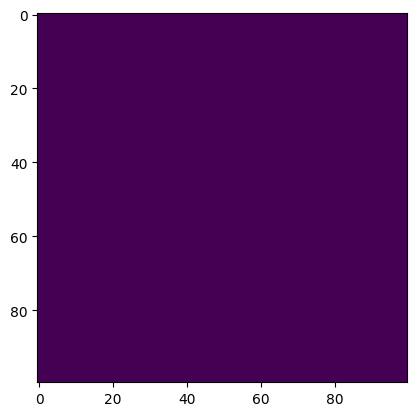

In [4]:
#Thresholding the image.
# i set all pixels greater than 225 to 225
# i also set pixels less than 225 to 225
thresh = cv2.threshold(gray_scaled, 225,225, cv2.THRESH_BINARY_INV)[1]
imgplt = plt.imshow(thresh)
plt.show()
# cv2.imshow("Thresholding Applied", thresh)
# cv2.waitKey(0)

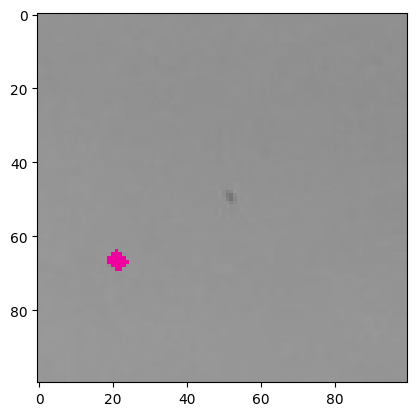

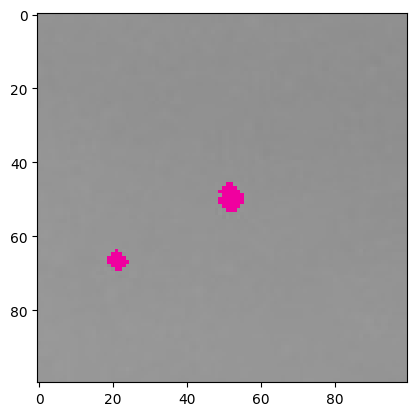

In [5]:
#detecting and drawing contours.
# first we find the contours in the thresholded image.
contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
output = image.copy()
for contour in contours:# loop over each contour found
    cv2.drawContours(output, [contour], -1,(240,0,159),3) # outline and display them, one by one.
    imgplt = plt.imshow(output)
    plt.show()
    # cv2.imshow("Contours", output)
    # cv2.waitKey(0)

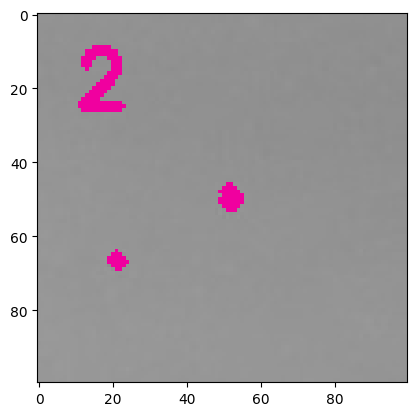

In [6]:
# count the number of objects found in the image
# write count as text too.
text = "{} ".format(len(contours))
cv2.putText(output, text, (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(240, 0, 159), 2)
imgplt = plt.imshow(output)
plt.show()
# cv2.imshow("Description", output)
# cv2.waitKey(0)

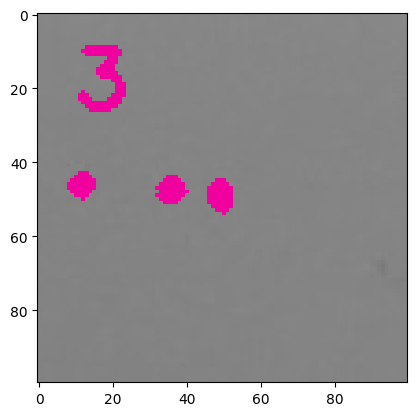

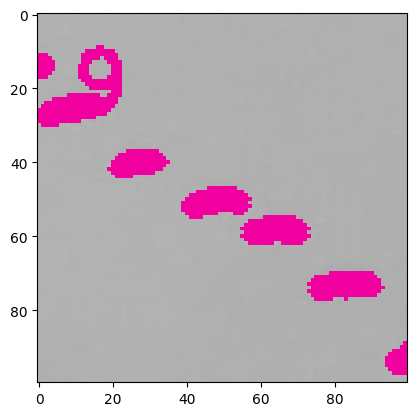

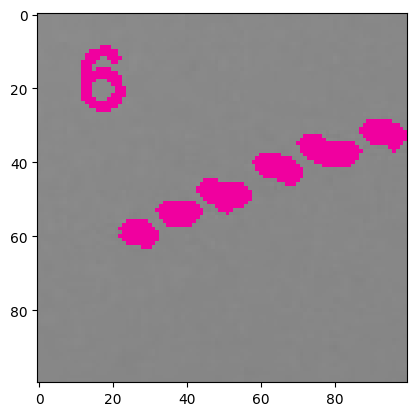

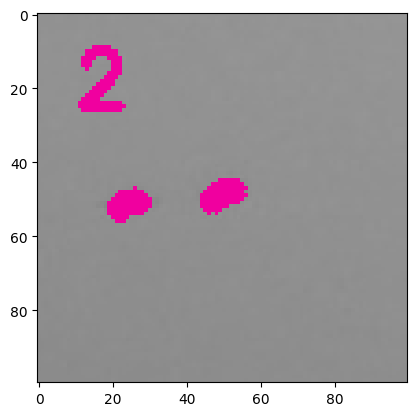

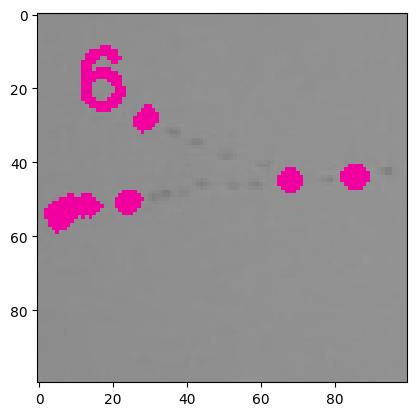

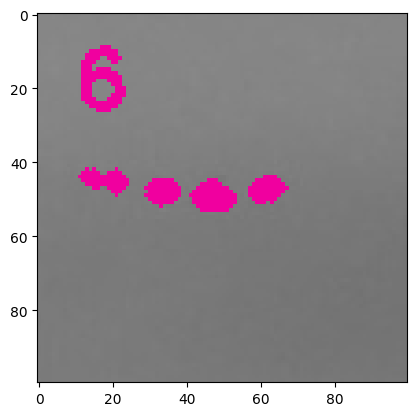

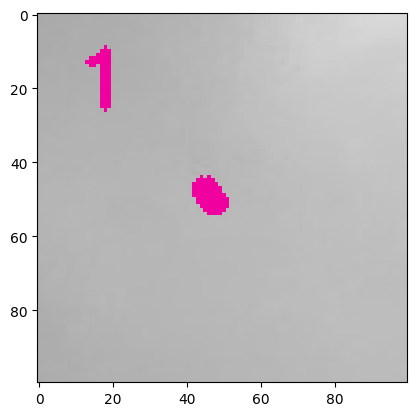

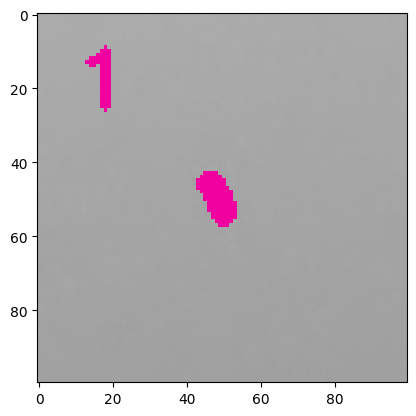

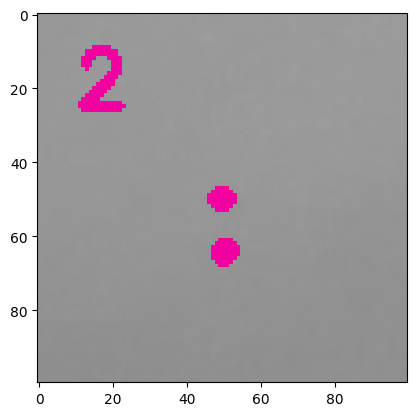

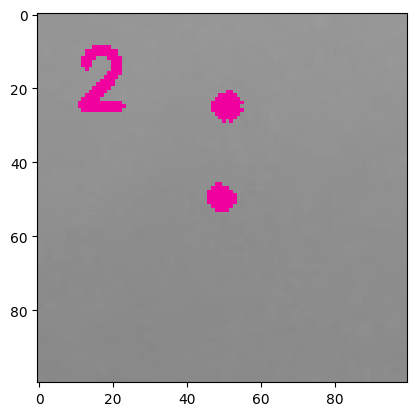

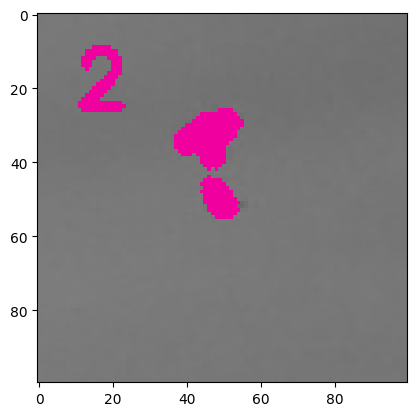

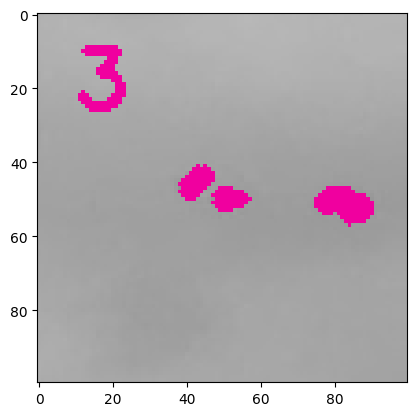

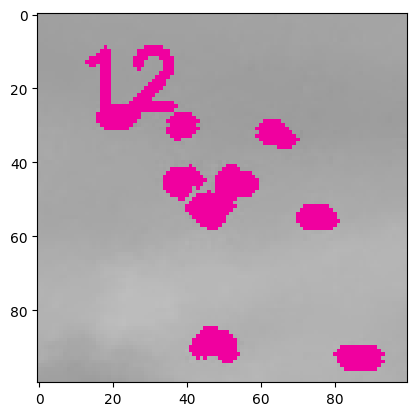

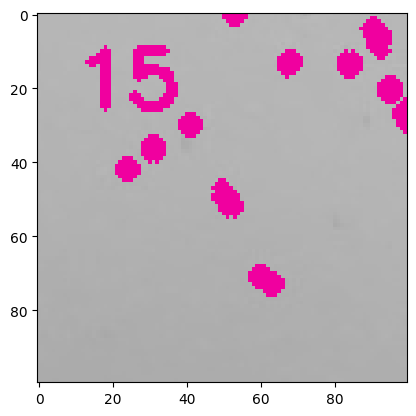

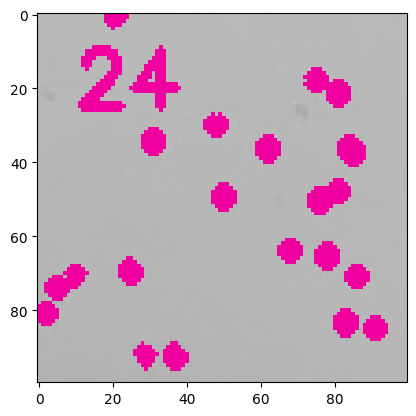

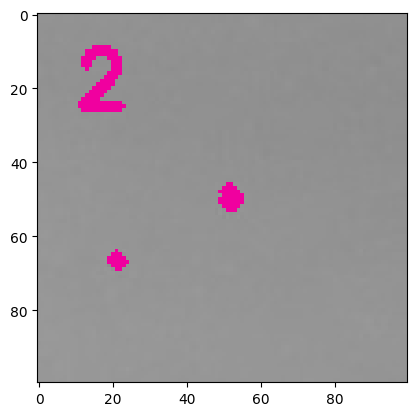

In [8]:
import os

folder_path = 'bird_miniatures'

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    image = cv2.imread(folder_path + '/' + filename)
    # convert  the image to a grayscale type.
    gray_scaled = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(gray_scaled, 30,90)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    output = image.copy()
    for contour in contours:# loop over each contour found
        cv2.drawContours(output, [contour], -1,(240,0,159),3) # outline and display them, one by one.
    text = "{} ".format(len(contours))
    cv2.putText(output, text, (10,25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(240, 0, 159), 2)
    imgplt = plt.imshow(output)
    plt.show()
